# Datasets - extra

Data science libraries hebben (soms) ook ingebouwde datasets.
In deze notebook enkele datasets voorbeelden uit `scikit-learn` en `seaborn`.

#### Wat ga je doen?
Doorloop en voeruit (*Run* of *Shift+Enter*) de Python voorbeelden en doe de opdracht. Kijk niet te snel in de voorbeeldoplossingen notebook, maar probeer eerst alles zelf op te lossen.

---

## Datasets from scikit-learn

Maak ook gebruik van `help(sklean.datasets)` om te zien wat mogelijk is!

Voorbeelden:
- iris
- diabetes
- Titanic
- diverse data generatie methoden

In [1]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

# datasets package from scikit-learn
import sklearn.datasets

<class 'pandas.core.frame.DataFrame'>
----------------------------------------
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9        

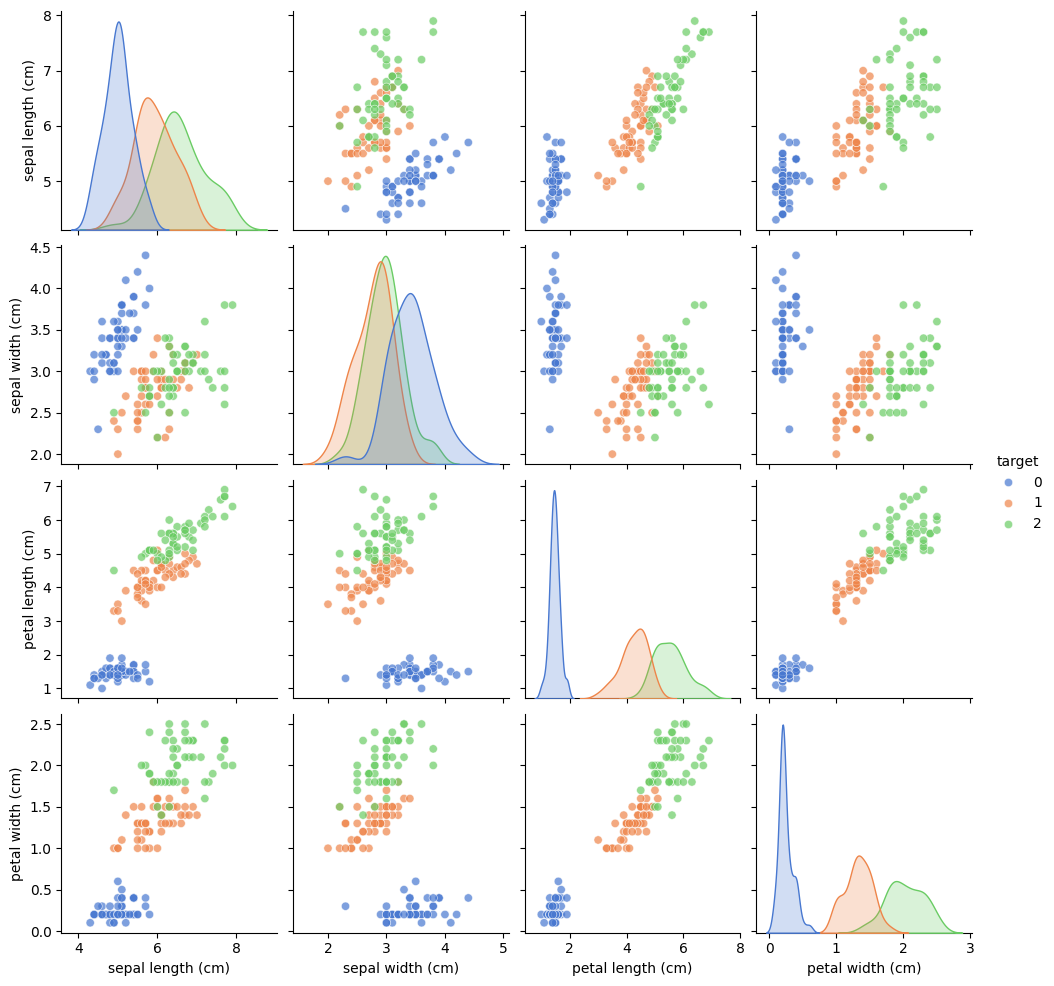

In [2]:
# Iris dataset
data, target = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
data["target"] = target

# print type of the data and data
print(type(data))
print('-'*40)
print(data)
print('-'*40)

# make pairplot for visual inspection 
# possible clustering and/or correlations
sns.pairplot(data, kind="scatter", 
             diag_kind="kde", hue="target",
             palette="muted", 
             plot_kws={'alpha':0.7})
plt.show()

In [3]:
# diabetes dataset
data = sklearn.datasets.fetch_openml("diabetes",
                                    version=1,
                                    as_frame=True,
                                    return_X_y=False)
data = data["frame"]

# print type of the data and data
print(type(data))
print('-'*40)
print(data)
print('-'*40)

c:\Users\hq0132410\Downloads\Introduction-to-machine-learning\.venv\Lib\site-packages\sklearn\datasets\_openml.py:74: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


<class 'pandas.core.frame.DataFrame'>
----------------------------------------
     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]
----------------------------------------


In [4]:
# id=42437 => Titanic dataset
data = sklearn.datasets.fetch_openml(
    data_id=42437, 
    return_X_y=False, 
    as_frame=True)

data = data["frame"]

print(type(data))
print("-"*40)
print(data)

<class 'pandas.core.frame.DataFrame'>
----------------------------------------
     Survived  Pclass  Sex  Age  Fare  Embarked  relatives  Title
0           0       3    0    2     0         0          1      1
1           1       1    1    5     3         1          1      3
2           1       3    1    3     0         0          0      2
3           1       1    1    5     3         0          1      3
4           0       3    0    5     1         0          0      1
..        ...     ...  ...  ...   ...       ...        ...    ...
886         0       2    0    3     1         0          0      5
887         1       1    1    2     2         0          0      2
888         0       3    1    1     2         0          3      2
889         1       1    0    3     2         1          0      1
890         0       3    0    4     0         2          0      1

[891 rows x 8 columns]


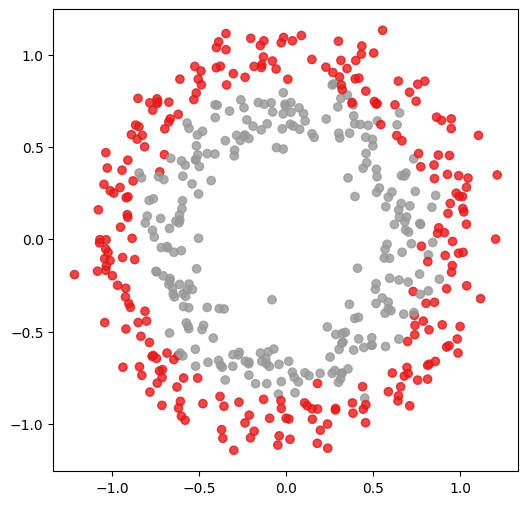

In [5]:
# non-linear datasets - circles
from sklearn.datasets import make_circles

data, target = make_circles(n_samples=500, shuffle=True, factor=0.7, noise=0.1)
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:,1], 
            c=target, alpha=0.8, 
            cmap="Set1")
plt.show()

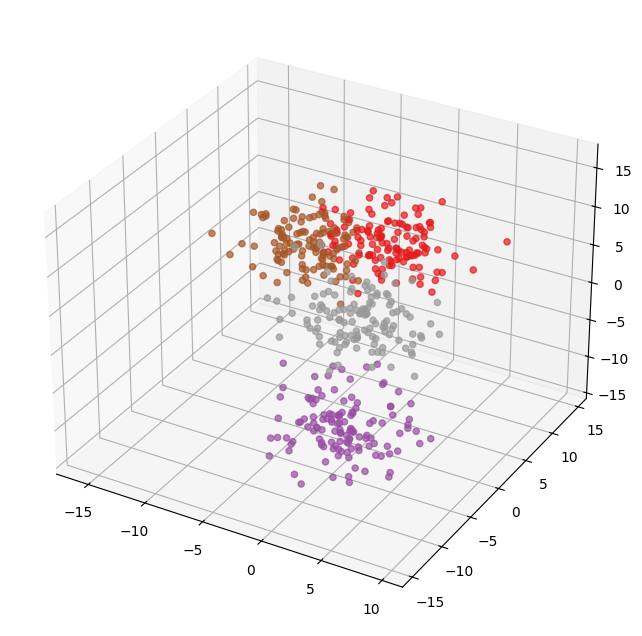

In [6]:
# 3 clusters of blobs
from sklearn.datasets import make_blobs

data, target = make_blobs(n_samples=500, 
                          n_features=3, centers=4,
                          shuffle=True, 
                          random_state=42, 
                          cluster_std=2.5)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], 
           c=target, alpha=0.7, cmap="Set1")
plt.show()

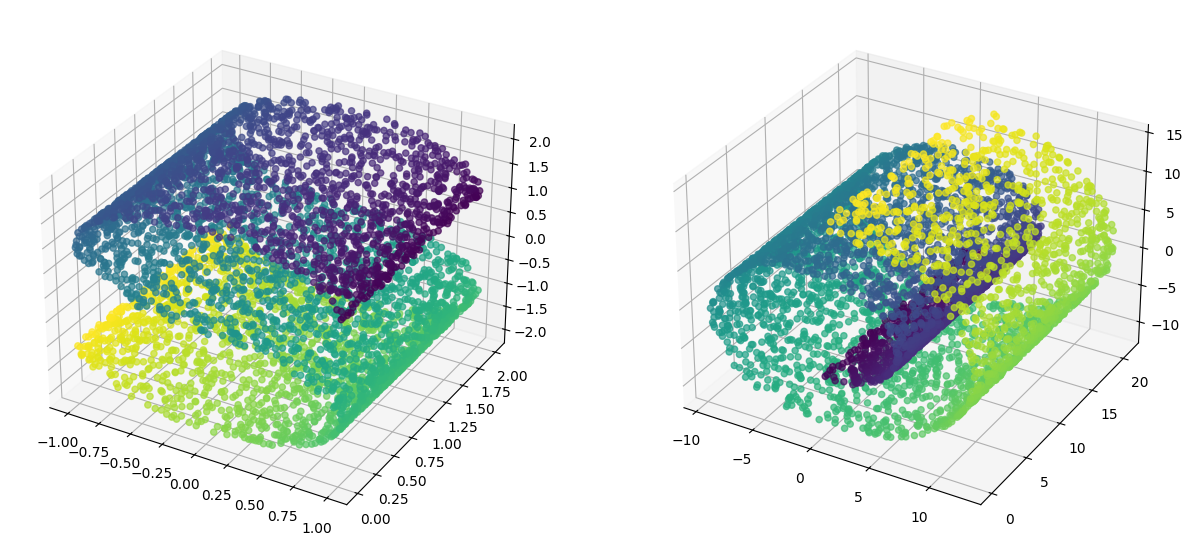

In [7]:
# s-curves...
from sklearn.datasets import make_s_curve, make_swiss_roll

data, target = make_s_curve(n_samples=5000, random_state=42)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], 
           c=target, alpha=0.7, cmap="viridis")

data, target = make_swiss_roll(n_samples=5000, random_state=42)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], 
           c=target, alpha=0.7, cmap="viridis")

plt.show()


### Kunstmatige dataset

Scikit-learn kan ook datasets voor jou genereren. Nuttig als je een modellering wilt doen en verlegen zit om data.

- dataset voor (linear) regression problemen
- dataset voor classificatie problemen

Onderzoek de argumenten van de `make_regression` methode voor een correcte dataset.

In [8]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate 10-dimensional features and 1-dimensional targets
X, y = make_regression(n_samples=500, n_features=10, n_targets=1, n_informative=4,
                       noise=0.5, bias=-2.5, random_state=42)

# Run linear regression on the data
reg = LinearRegression()
reg.fit(X, y)

# Print the coefficient and intercept found
with np.printoptions(precision=5, linewidth=100, suppress=True):
    print(np.array(reg.coef_))
    print(reg.intercept_)

[-0.00435 -0.02232 19.0113   0.04391 46.04906 -0.02882 -0.05692 28.61786 -0.01839 16.79397]
-2.510636712673143


In [9]:
# data generation for classification modelling
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import numpy as np

# Generate 10-dimensional features and 3-class targets
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3,
                           n_informative=4, n_redundant=2, n_repeated=1,
                           random_state=42)

# Run SVC on the data
clf = SVC(kernel="rbf")
clf.fit(X, y)

# Print the accuracy
print(clf.score(X, y))


0.875


## Datasets from seaborn

- iris dataset
- lijst van datasets
- **Opdracht**: experimenteer met de datasets uit seaborn.


In [10]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

type of data: <class 'pandas.core.frame.DataFrame'>
----------------------------------------
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
----------------------------------------


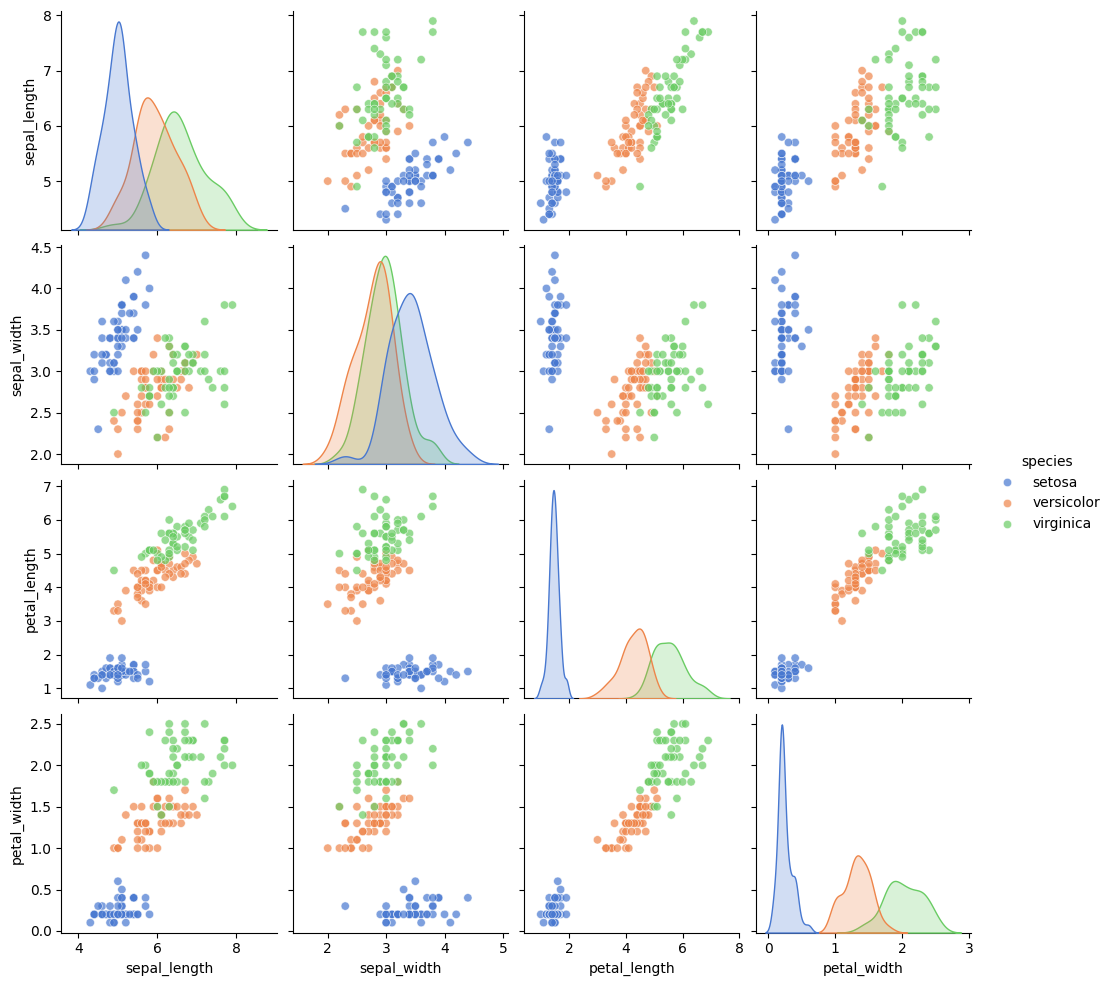

In [11]:
# Iris dataset
data = sns.load_dataset("iris")

print(f"type of data: {type(data)}")
print('-'*40)

print(data)
print('-'*40)

sns.pairplot(data, kind="scatter", 
             diag_kind="kde", hue="species",
             palette="muted", 
             plot_kws={'alpha':0.7})
plt.show()

In [12]:
# listing of all the datasets in Seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Opdracht Seaborn dataset

Voor elke bestaande dataset in Seaborn:
- print de naam van de dataset
- print type of data
- print (deel van de) data
- maak een `pairplot` van de attributen

**Tip**: Maak gebruik van de Iris voorbeeld-code, de `sns.get_dataset_names()` methode en van exception-handling.

In [ ]:
# hier komt jouw code...
